In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf  #plot the acf and pacf 

import statsmodels.api as sm  #LJung Box test
from sklearn.metrics import mean_squared_error

from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_model import ARMA

import warnings
warnings.filterwarnings('ignore')

In [2]:
furn_df=pd.read_excel("DS3_C6_S4_TimeSeries_Sales_Data_Project.xlsx",parse_dates=['Order Date'])
furn_df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [3]:
furn_df.sort_values(by='Order Date',inplace=True)

In [4]:
furn_df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
7980,7981,CA-2014-103800,2014-01-03,2014-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
739,740,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
740,741,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
741,742,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
1759,1760,CA-2014-141817,2014-01-05,2014-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5091,5092,CA-2017-156720,2017-12-30,2018-01-03,Standard Class,JM-15580,Jill Matthias,Consumer,United States,Loveland,...,80538,West,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048
908,909,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,...,10009,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910
907,908,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,...,10009,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279
1296,1297,CA-2017-115427,2017-12-30,2018-01-03,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,...,94533,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188


In [5]:
furn_df.dtypes



Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [6]:
furn_df=furn_df.set_index('Order Date')
furn_df

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,
2014-01-03,7981,CA-2014-103800,2014-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
2014-01-04,740,CA-2014-112326,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
2014-01-04,741,CA-2014-112326,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
2014-01-04,742,CA-2014-112326,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
2014-01-05,1760,CA-2014-141817,2014-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,Pennsylvania,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-30,5092,CA-2017-156720,2018-01-03,Standard Class,JM-15580,Jill Matthias,Consumer,United States,Loveland,Colorado,80538,West,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048
2017-12-30,909,CA-2017-143259,2018-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,10009,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910
2017-12-30,908,CA-2017-143259,2018-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,10009,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279


In [7]:
furn_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9994 entries, 2014-01-03 to 2017-12-30
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Ship Date      9994 non-null   datetime64[ns]
 3   Ship Mode      9994 non-null   object        
 4   Customer ID    9994 non-null   object        
 5   Customer Name  9994 non-null   object        
 6   Segment        9994 non-null   object        
 7   Country        9994 non-null   object        
 8   City           9994 non-null   object        
 9   State          9994 non-null   object        
 10  Postal Code    9994 non-null   int64         
 11  Region         9994 non-null   object        
 12  Product ID     9994 non-null   object        
 13  Category       9994 non-null   object        
 14  Sub-Category   9994 non-null   object        
 15  Pro

In [8]:
y = furn_df["Sales"].resample('M').sum() #M means Month 
y.head()

Order Date
2014-01-31    14236.895
2014-02-28     4519.892
2014-03-31    55691.009
2014-04-30    28295.345
2014-05-31    23648.287
Freq: M, Name: Sales, dtype: float64

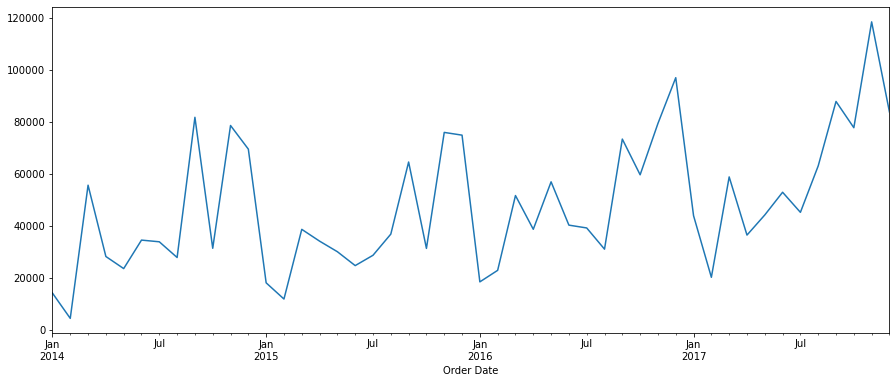

In [9]:
y.plot(figsize=(15,6))
plt.show()

### The plot clearly indicates that the time series has seasonality pattern. The sales are always low at the beginning of the year and high at the end of the year. There is always an upward trend within any single year with a couple of low months in the mid of the year.

# Checking Stationarity:

 Augmented Dickey-Fuller(ADF) statistic is one of the more widely used statistic test to check whether your time series is stationary or non-stationary. It uses an autoregressive model and optimizes an information criterion across multiple different lag values.


## Performing the Dicky Fuller Test:

In [10]:
from pandas import Series
from statsmodels.tsa.stattools import adfuller
        

In [11]:
def checkStationarity(data):
    pvalue = adfuller(data)[1]
    
    if(pvalue>0.05):
        msg = 'p-value= {}. Data is not stationary'.format(pvalue)
    else:
        msg='p-value=  {}. Data is stationary'.format(pvalue)
        
    return(msg)

In [12]:
checkStationarity(y)

'p-value=  0.00020180198458237758. Data is stationary'

## The p-value is 0.0002, which is way below the threshold (0.05). Hence the null-hypothesis is rejected. It  means it is stationary.

#     

# Decomposing:

### Decomposing the time series into three distinct components: trend, seasonality,and noise

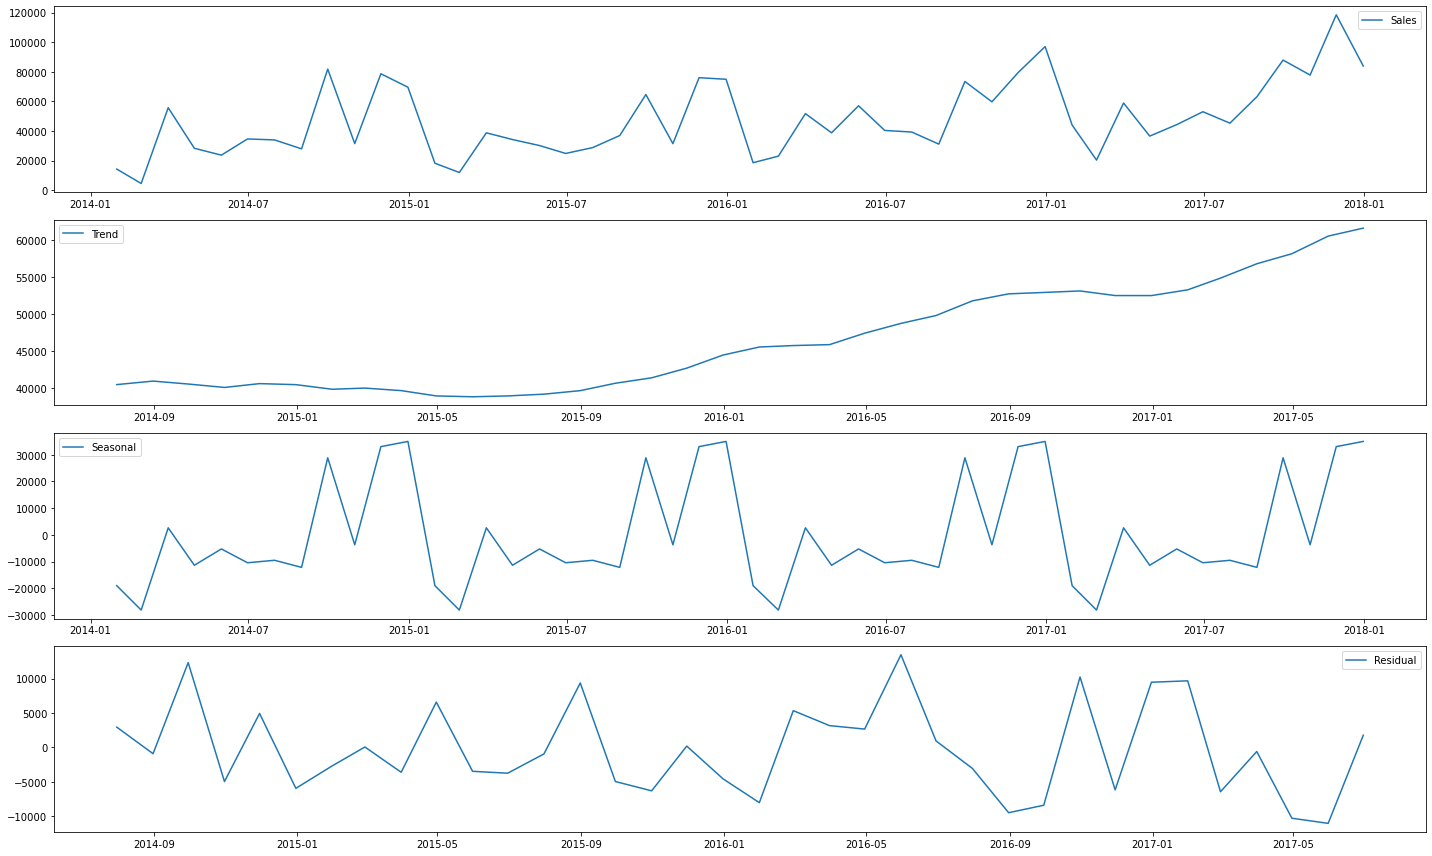

In [13]:
comp=seasonal_decompose(y,period=12)
y_trend=comp.trend
y_seasonal=comp.seasonal
y_residual=comp.resid

# plotting all the 4 graphs
fig,ax = plt.subplots(4,1,figsize=(20,12))

plt.subplot(411)
plt.plot(y,label='Sales')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(y_trend,label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(y_seasonal,label='Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(y_residual,label='Residual')
plt.legend(loc='best')

plt.tight_layout()

## The plot clearly indicates that the time series has seasonality pattern. The sales are always low at the beginning of the year and high at the end of the year. There is always an upward trend within any single year with a couple of low months in the mid of the year.

In [14]:
y

Order Date
2014-01-31     14236.8950
2014-02-28      4519.8920
2014-03-31     55691.0090
2014-04-30     28295.3450
2014-05-31     23648.2870
2014-06-30     34595.1276
2014-07-31     33946.3930
2014-08-31     27909.4685
2014-09-30     81777.3508
2014-10-31     31453.3930
2014-11-30     78628.7167
2014-12-31     69545.6205
2015-01-31     18174.0756
2015-02-28     11951.4110
2015-03-31     38726.2520
2015-04-30     34195.2085
2015-05-31     30131.6865
2015-06-30     24797.2920
2015-07-31     28765.3250
2015-08-31     36898.3322
2015-09-30     64595.9180
2015-10-31     31404.9235
2015-11-30     75972.5635
2015-12-31     74919.5212
2016-01-31     18542.4910
2016-02-29     22978.8150
2016-03-31     51715.8750
2016-04-30     38750.0390
2016-05-31     56987.7280
2016-06-30     40344.5340
2016-07-31     39261.9630
2016-08-31     31115.3743
2016-09-30     73410.0249
2016-10-31     59687.7450
2016-11-30     79411.9658
2016-12-31     96999.0430
2017-01-31     43971.3740
2017-02-28     20301.1334
2

In [15]:
ratio=0.7
ss1=int(len(y)*ratio)
train=y[:ss1]
test=y[ss1:]

In [16]:
ss1

33

In [17]:
train

Order Date
2014-01-31    14236.8950
2014-02-28     4519.8920
2014-03-31    55691.0090
2014-04-30    28295.3450
2014-05-31    23648.2870
2014-06-30    34595.1276
2014-07-31    33946.3930
2014-08-31    27909.4685
2014-09-30    81777.3508
2014-10-31    31453.3930
2014-11-30    78628.7167
2014-12-31    69545.6205
2015-01-31    18174.0756
2015-02-28    11951.4110
2015-03-31    38726.2520
2015-04-30    34195.2085
2015-05-31    30131.6865
2015-06-30    24797.2920
2015-07-31    28765.3250
2015-08-31    36898.3322
2015-09-30    64595.9180
2015-10-31    31404.9235
2015-11-30    75972.5635
2015-12-31    74919.5212
2016-01-31    18542.4910
2016-02-29    22978.8150
2016-03-31    51715.8750
2016-04-30    38750.0390
2016-05-31    56987.7280
2016-06-30    40344.5340
2016-07-31    39261.9630
2016-08-31    31115.3743
2016-09-30    73410.0249
Freq: M, Name: Sales, dtype: float64

In [18]:
test

Order Date
2016-10-31     59687.7450
2016-11-30     79411.9658
2016-12-31     96999.0430
2017-01-31     43971.3740
2017-02-28     20301.1334
2017-03-31     58872.3528
2017-04-30     36521.5361
2017-05-31     44261.1102
2017-06-30     52981.7257
2017-07-31     45264.4160
2017-08-31     63120.8880
2017-09-30     87866.6520
2017-10-31     77776.9232
2017-11-30    118447.8250
2017-12-31     83829.3188
Freq: M, Name: Sales, dtype: float64

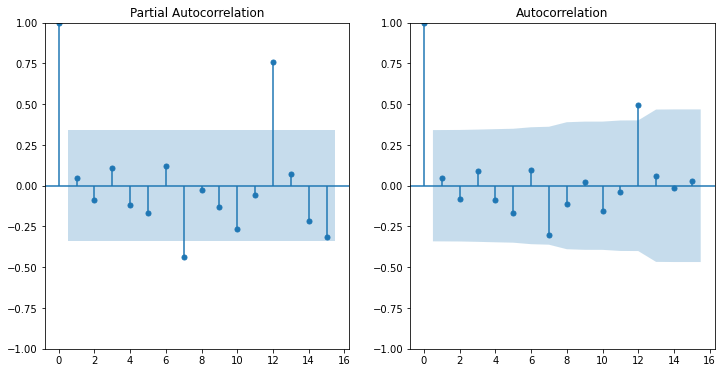

In [19]:
_,ax=plt.subplots(1,2,figsize=(12,6))

plot_pacf(train,lags=15,ax=ax[0]);
plot_acf(train,lags=15,ax=ax[1]);

In [20]:
p=[0,1,2] 
q=[0,1]


p1=[]
q1=[]
aic1=[]
rmse1=[]

def modelcheck(p,q):
    p1.append(p)
    q1.append(q)
    model=ARIMA(train,order=(p,0,q)).fit()
    aic=model.aic
    aic1.append(aic)
    fcast=model.forecast(len(test))
    actual = []; pred = []
    for i in range(len(fcast)):
        actual.append(test[i])
        pred.append(fcast[i])
    df= pd.DataFrame({'actual':actual, 'predicted':pred})
    rmse=mean_squared_error(df.actual,df.predicted,squared=False)
    rmse1.append(rmse)
     

In [21]:
for i in p:
    for j in q:
        modelcheck(i,j)
        
df_value=pd.DataFrame({"p": p1,"q": q1,"aic":aic1,"RMSE":rmse1})
df_value.sort_values('RMSE')

,p,q,aic,RMSE
1,0,1,755.845326,34878.005917
2,1,0,755.831429,34885.828384
3,1,1,757.614617,34888.342335
0,0,0,837.295202,34955.749523
5,2,1,759.371695,35070.079005
4,2,0,757.685175,35145.418370


## Choosing lowest value of rmse and AIC at p=1 and q=1, since lower the AIC & rmse, better the model.

### Rebuilding model using optimum p and q values:

In [22]:
model_arima=ARIMA(train,order=(0,0,1)).fit()
model_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   33
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -374.923
Date:                Sun, 13 Nov 2022   AIC                            755.845
Time:                        15:12:31   BIC                            760.335
Sample:                    01-31-2014   HQIC                           757.356
                         - 09-30-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.024e+04   3691.776     10.900      0.000     3.3e+04    4.75e+04
ma.L1          0.0658      0.162      0.405      0.686      -0.253       0.384
sigma2      4.116e+08      0.060   6.86e+09      0.000    4.12e+08    4.12e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.67
Prob(Q):                              0.97   Prob(JB):                         0.26
Heteroskedasticity (H):               0.78   Skew:                             0.59
Prob(H) (two-sided):                  0.69   Kurtosis:                         2.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.14e+25. Standard errors may be unstable.
"""

In [23]:
fcast1=model_arima.fittedvalues

In [24]:
df_f = pd.DataFrame({'actual':y, 'forecast':fcast1})
len(df_f)

48

In [25]:
A= df_f.iloc[0:30]

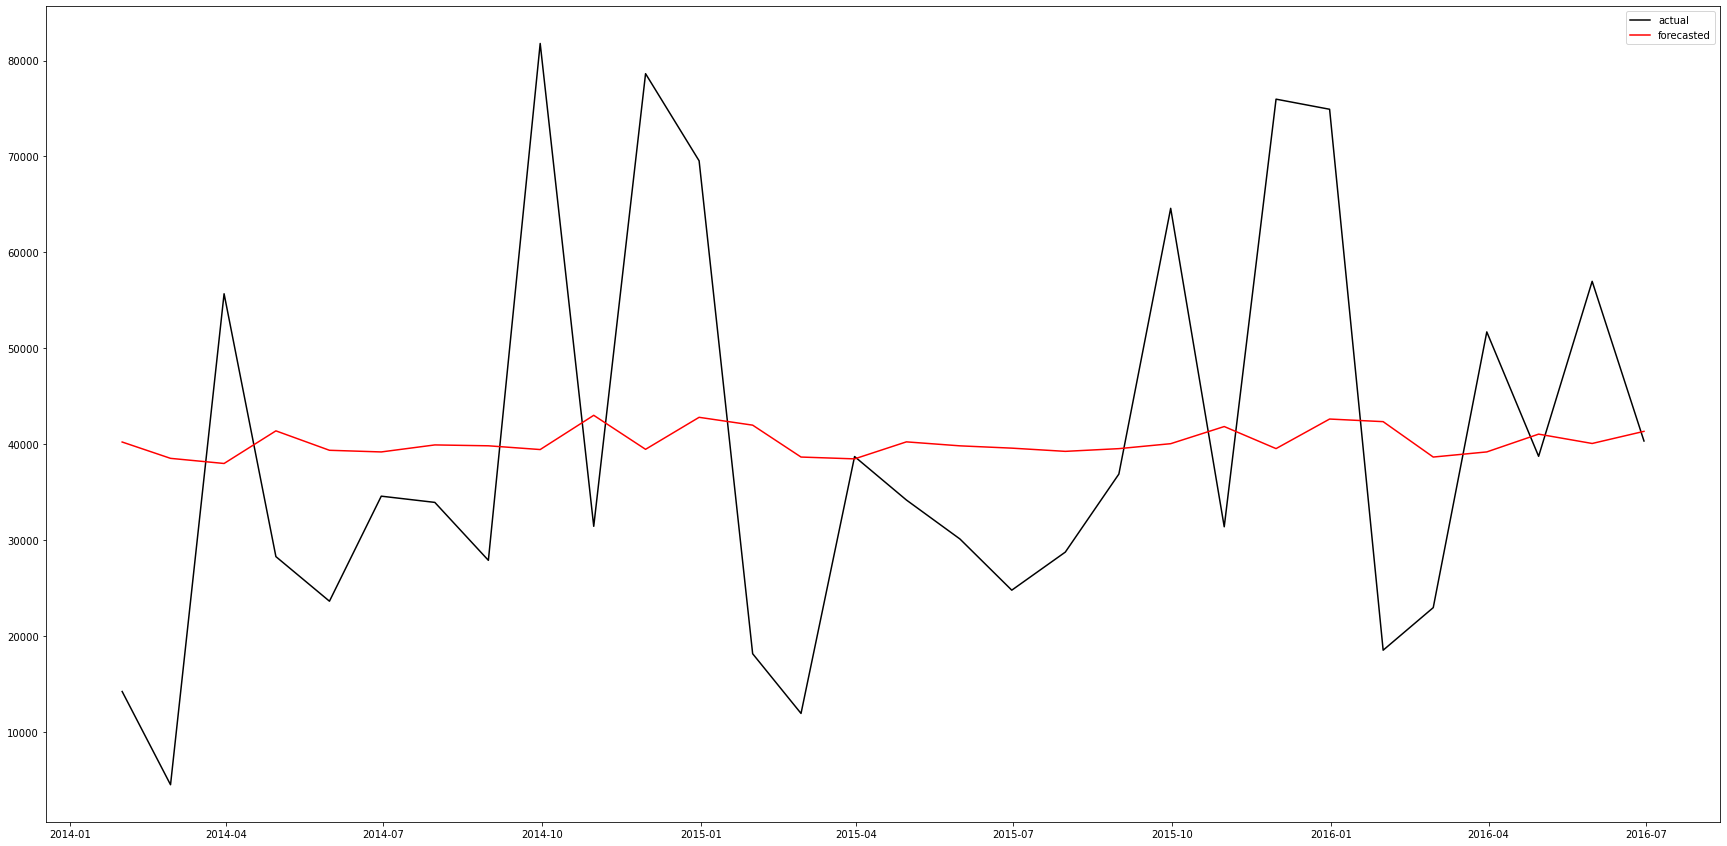

In [26]:
plt.figure(figsize=(30, 15))
plt.plot(A['actual'], c='black', label='actual')
plt.plot(A['forecast'], c='red', label='forecasted')
plt.legend()
plt.show()

In [27]:
mse1= mean_squared_error(A.actual , A.forecast)
mse1

434274172.4491096

In [28]:
aic1=model_arima.aic
aic1

755.845325577989

In [29]:
bic1=model_arima.bic
bic1

760.3348482623884

In [30]:
rmse1=mean_squared_error( A.actual , A.forecast, squared=False)
rmse1

20839.245966423776

## SARIMA

In [32]:
sales_comp=seasonal_decompose(y,period=12)
sales_seasonal=sales_comp.seasonal

In [33]:
checkStationarity(sales_seasonal)

'p-value=  0.0. Data is stationary'

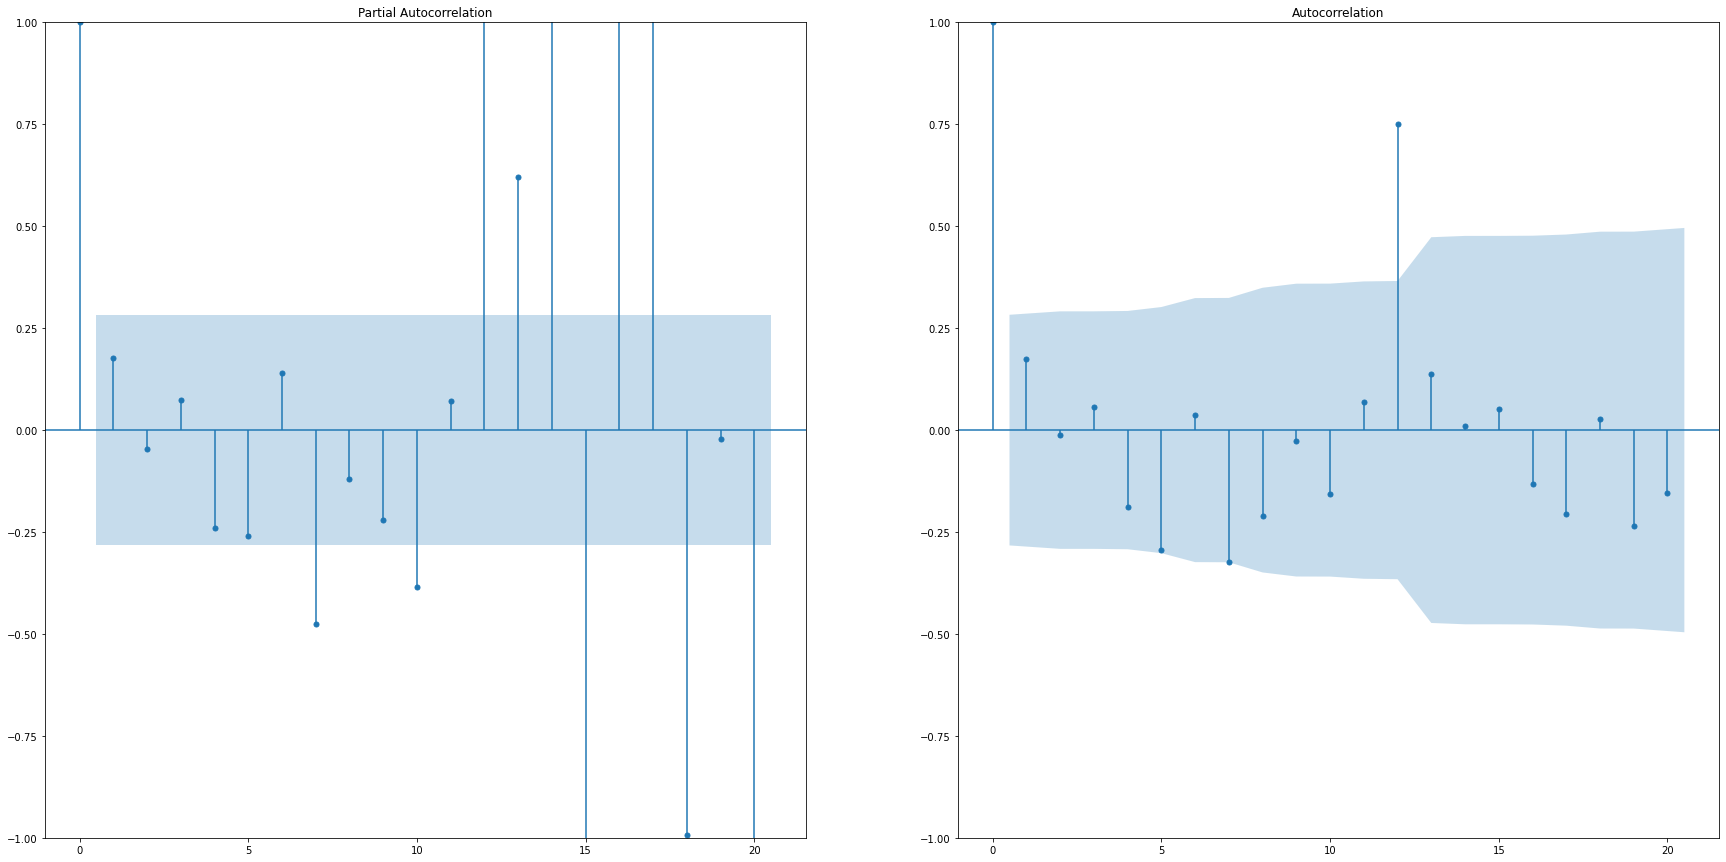

In [72]:
_,ax=plt.subplots(1,2,figsize=(30,15))

plot_pacf(sales_seasonal,lags=20,ax=ax[0]);
plot_acf(sales_seasonal,lags=20,ax=ax[1]);

In [73]:
#p=[0-11]
#q=[0-2]

In [87]:
# for seasonal data, use the SARIMAX. start with initial values for p,d,q
m_seasonal= auto_arima(y,start_p=0, max_p=11, start_q=0, max_q=2, seasonal=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1098.402, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1091.142, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1086.023, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1096.548, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1087.981, Time=0.02 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1088.734, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1088.580, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1084.612, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1085.789, Time=0.01 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1085.792, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1089.631, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1087.425, Time=0.03 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.202 seconds


In [122]:
p=0;q=1;d=0
P=0;Q=1;D=1
model_sari=sm.tsa.statespace.SARIMAX(y,order=(p,d,q), seasonal_order=(P,D,Q,12)).fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.25750D+00    |proj g|=  2.38114D-01

At iterate    5    f=  8.24510D+00    |proj g|=  2.33121D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7      9      1     0     0   6.074D-06   8.245D+00
  F =   8.2450969763278348     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


In [123]:
model_sari.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   48
Model:             SARIMAX(0, 0, 1)x(0, 1, 1, 12)   Log Likelihood                -395.765
Date:                            Sun, 13 Nov 2022   AIC                            797.529
Time:                                    16:10:49   BIC                            802.280
Sample:                                01-31-2014   HQIC                           799.187
                                     - 12-31-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2449      0.194      1.261      0.207      -0.136       0.626
ma.S.L12      -0.1027      0.144     -0.712      0.477      -0.385       0.180
sigma2      2.345e+08   2.08e-10   1.13e+18      0.000    2.35e+08    2.35e+08
===================================================================================
Ljung-Box (L1) (Q):                   1.57   Jarque-Bera (JB):                 0.48
Prob(Q):                              0.21   Prob(JB):                         0.78
Heteroskedasticity (H):               3.73   Skew:                             0.19
Prob(H) (two-sided):                  0.03   Kurtosis:                         2.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.31e+34. Standard errors may be unstable.
"""

### prediction using test :

In [124]:
fcast_sarima=model_sari.forecast(len(test))

In [125]:
df_sarima = pd.DataFrame({'actual':y, 'forecast':fcast_sarima})
df_sarima.head()

,actual,forecast
2014-01-31,14236.895,NaN
2014-02-28,4519.892,NaN
2014-03-31,55691.009,NaN
2014-04-30,28295.345,NaN
2014-05-31,23648.287,NaN


### forecasting using model fitted values:

In [126]:
fcast_sari=model_sari.fittedvalues

In [127]:
df_sari = pd.DataFrame({'actual':y, 'forecast':fcast_sari})
df_sari.head()

,actual,forecast
Order Date,,
2014-01-31,14236.895,0.000000
2014-02-28,4519.892,3276.302085
2014-03-31,55691.009,302.187801
2014-04-30,28295.345,13501.501038
2014-05-31,23648.287,3606.796726


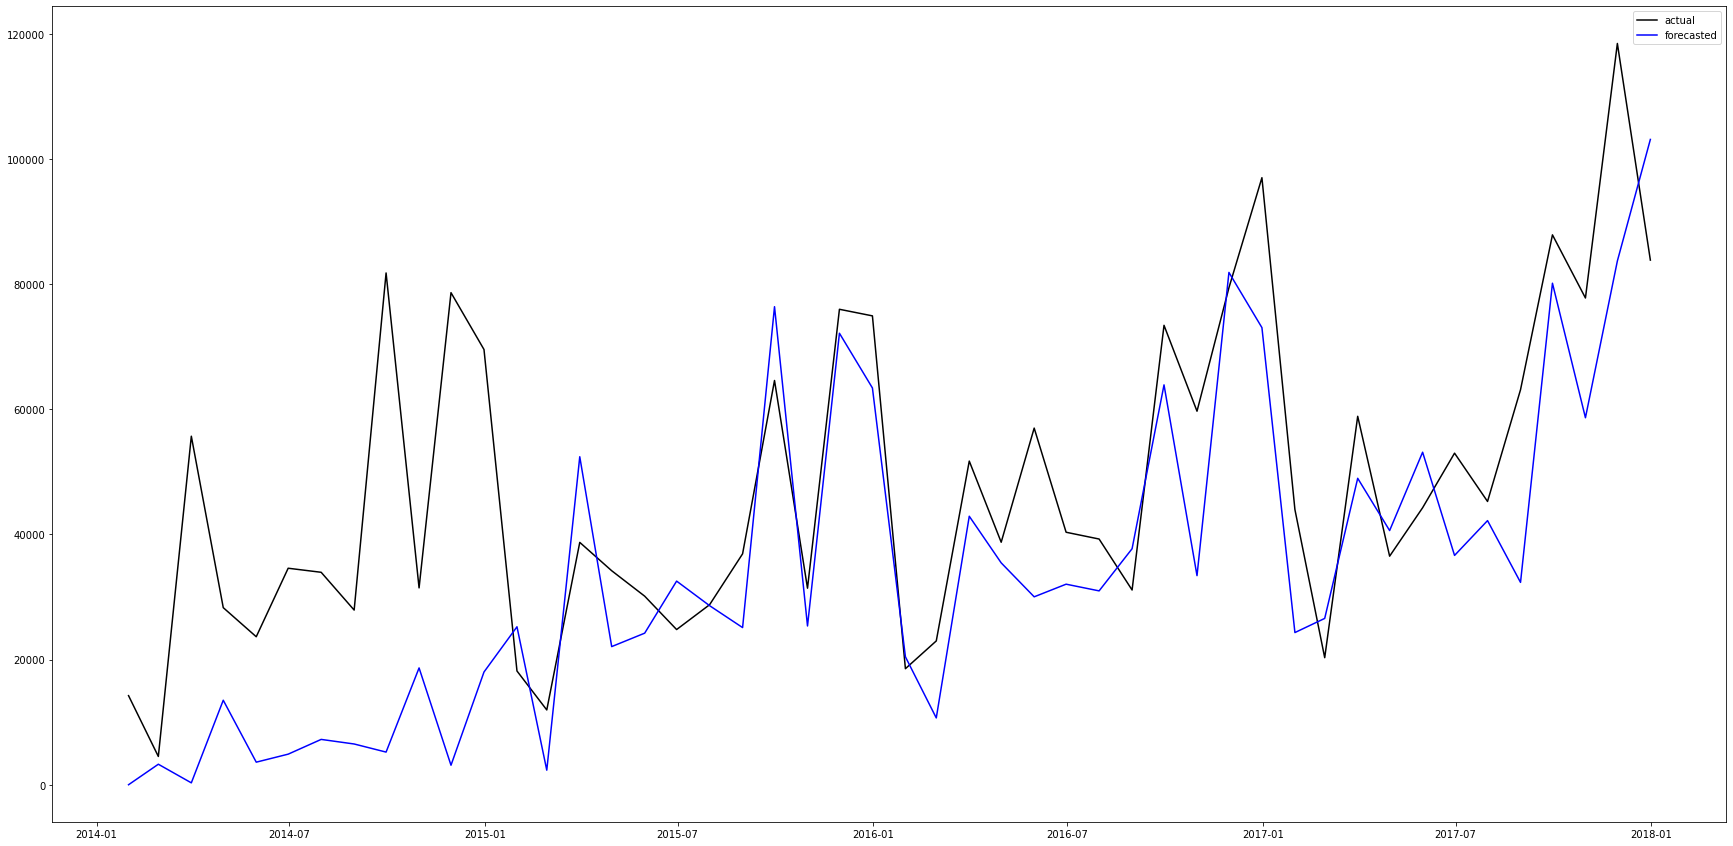

In [128]:
plt.figure(figsize=(30, 15))
plt.plot(df_sari['actual'], c='black', label='actual')
plt.plot(df_sari['forecast'], c='blue', label='forecasted')
plt.legend()
plt.show()

In [129]:
mse2= mean_squared_error(y , fcast_sari)
mse2

577589527.3080263

In [130]:
aic2=model_sari.aic
aic2

797.5293097274721

In [131]:
bic2=model_sari.bic
bic2

802.2798665428404

In [132]:
rmse2=mean_squared_error(y, fcast_sari, squared=False)
rmse2
     

24033.092337608705

## SARIMAX with exogenous variables :

In [135]:
furn_df1=furn_df[['Discount','Profit','Sales']].resample('M').sum()

In [136]:
furn_df1

,Discount,Profit,Sales
Order Date,,,
2014-01-31,10.00,2450.1907,14236.8950
2014-02-28,8.10,862.3084,4519.8920
2014-03-31,26.30,498.7299,55691.0090
2014-04-30,14.85,3488.8352,28295.3450
2014-05-31,18.95,2738.7096,23648.2870
2014-06-30,23.22,4976.5244,34595.1276
2014-07-31,24.55,-841.4826,33946.3930
2014-08-31,20.05,5318.1050,27909.4685
2014-09-30,42.87,8328.0994,81777.3508


In [137]:
rows=int(0.7*len(furn_df1))
rows

33

In [138]:
train=furn_df1.iloc[:rows]
test=furn_df1.iloc[rows:]
test

,Discount,Profit,Sales
Order Date,,,
2016-10-31,28.85,16243.1425,59687.7450
2016-11-30,58.32,4011.4075,79411.9658
2016-12-31,47.67,17885.3093,96999.0430
2017-01-31,25.00,7140.4391,43971.3740
2017-02-28,19.47,1613.8720,20301.1334
2017-03-31,31.14,14751.8915,58872.3528
2017-04-30,39.47,933.2900,36521.5361
2017-05-31,36.89,6342.5828,44261.1102
2017-06-30,42.12,8223.3357,52981.7257


In [139]:
exog_train= train[['Discount','Profit']]
exog_test= test[['Discount', 'Profit']]

exog_train




,Discount,Profit
Order Date,,
2014-01-31,10.00,2450.1907
2014-02-28,8.10,862.3084
2014-03-31,26.30,498.7299
2014-04-30,14.85,3488.8352
2014-05-31,18.95,2738.7096
2014-06-30,23.22,4976.5244
2014-07-31,24.55,-841.4826
2014-08-31,20.05,5318.1050
2014-09-30,42.87,8328.0994


In [140]:
test.Sales

Order Date
2016-10-31     59687.7450
2016-11-30     79411.9658
2016-12-31     96999.0430
2017-01-31     43971.3740
2017-02-28     20301.1334
2017-03-31     58872.3528
2017-04-30     36521.5361
2017-05-31     44261.1102
2017-06-30     52981.7257
2017-07-31     45264.4160
2017-08-31     63120.8880
2017-09-30     87866.6520
2017-10-31     77776.9232
2017-11-30    118447.8250
2017-12-31     83829.3188
Freq: M, Name: Sales, dtype: float64

In [141]:
train.Sales

Order Date
2014-01-31    14236.8950
2014-02-28     4519.8920
2014-03-31    55691.0090
2014-04-30    28295.3450
2014-05-31    23648.2870
2014-06-30    34595.1276
2014-07-31    33946.3930
2014-08-31    27909.4685
2014-09-30    81777.3508
2014-10-31    31453.3930
2014-11-30    78628.7167
2014-12-31    69545.6205
2015-01-31    18174.0756
2015-02-28    11951.4110
2015-03-31    38726.2520
2015-04-30    34195.2085
2015-05-31    30131.6865
2015-06-30    24797.2920
2015-07-31    28765.3250
2015-08-31    36898.3322
2015-09-30    64595.9180
2015-10-31    31404.9235
2015-11-30    75972.5635
2015-12-31    74919.5212
2016-01-31    18542.4910
2016-02-29    22978.8150
2016-03-31    51715.8750
2016-04-30    38750.0390
2016-05-31    56987.7280
2016-06-30    40344.5340
2016-07-31    39261.9630
2016-08-31    31115.3743
2016-09-30    73410.0249
Freq: M, Name: Sales, dtype: float64

In [142]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_sari2= SARIMAX(train.Sales, order=(0,1,1), seasonal_order=(0,1,1,12), exog=exog_train).fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.52620D+00    |proj g|=  5.22605D-01

At iterate    5    f=  6.32939D+00    |proj g|=  3.13058D-03

At iterate   10    f=  6.32935D+00    |proj g|=  1.43276D-04

At iterate   15    f=  6.32931D+00    |proj g|=  3.95772D-03

At iterate   20    f=  6.32477D+00    |proj g|=  4.55104D-02

At iterate   25    f=  6.30308D+00    |proj g|=  1.04415D-02

At iterate   30    f=  6.30267D+00    |proj g|=  3.00143D-05

At iterate   35    f=  6.30266D+00    |proj g|=  7.39299D-04

At iterate   40    f=  6.30146D+00    |proj g|=  9.17621D-03

At iterate   45    f=  6.25770D+00    |proj g|=  4.99905D-02

At iterate   50    f=  6.23315D+00    |proj g|=  8.86796D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


In [143]:
model_sari2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   33
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -205.694
Date:                            Sun, 13 Nov 2022   AIC                            421.388
Time:                                    16:11:48   BIC                            426.367
Sample:                                01-31-2014   HQIC                           422.360
                                     - 09-30-2016                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Discount    1172.1194    226.220      5.181      0.000     728.735    1615.503
Profit         0.8374      0.523      1.600      0.110      -0.189       1.863
ma.L1         -0.5150      0.275     -1.871      0.061      -1.055       0.025
ma.S.L12      -0.8587      0.281     -3.057      0.002      -1.409      -0.308
sigma2      3.956e+07    8.4e-05   4.71e+11      0.000    3.96e+07    3.96e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.84   Jarque-Bera (JB):                 8.95
Prob(Q):                              0.36   Prob(JB):                         0.01
Heteroskedasticity (H):               1.09   Skew:                             1.32
Prob(H) (two-sided):                  0.91   Kurtosis:                         4.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.11e+28. Standard errors may be unstable.
"""

In [144]:
fv= model_sari2.fittedvalues
fv

Order Date
2014-01-31    13773.039826
2014-02-28    10495.579908
2014-03-31    28411.043644
2014-04-30    31174.650171
2014-05-31    33922.269446
2014-06-30    35711.739579
2014-07-31    31845.736059
2014-08-31    32769.161090
2014-09-30    59632.214213
2014-10-31    46088.227576
2014-11-30    70251.807669
2014-12-31    80600.929902
2015-01-31    13918.734106
2015-02-28    15784.364343
2015-03-31    48031.149740
2015-04-30    40768.608217
2015-05-31    28856.649404
2015-06-30    29899.143532
2015-07-31    28801.032759
2015-08-31    28736.605277
2015-09-30    66917.105801
2015-10-31    31295.453200
2015-11-30    77479.267778
2015-12-31    55318.509795
2016-01-31    27582.206756
2016-02-29    15304.852582
2016-03-31    57814.517933
2016-04-30    39855.871816
2016-05-31    58730.943032
2016-06-30    38376.988098
2016-07-31    46560.085690
2016-08-31    41630.702864
2016-09-30    78181.754662
Freq: M, dtype: float64

In [145]:
fv_test2= model_sari2.forecast(len(test.Sales), exog=exog_test)
fv_test2

2016-10-31    39196.816955
2016-11-30    70965.612063
2016-12-31    69754.893670
2017-01-31    32481.359739
2017-02-28    19525.856725
2017-03-31    54313.671833
2017-04-30    44004.687595
2017-05-31    42258.158606
2017-06-30    50789.947855
2017-07-31    37467.401505
2017-08-31    36840.611093
2017-09-30    91541.513183
2017-10-31    59633.892314
2017-11-30    93202.313422
2017-12-31    84613.801134
Freq: M, Name: predicted_mean, dtype: float64

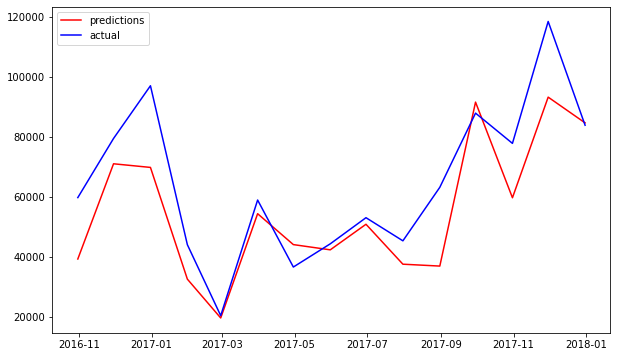

In [147]:
plt.figure(figsize=(10,6))
plt.plot(fv_test2 , 'r',label='predictions')
plt.plot(test.Sales , 'b',label='actual')
plt.legend()

In [148]:
mse3= mean_squared_error(test.Sales , fv_test2)
mse3

212250056.1810816

In [149]:
aic3=model_sari2.aic
aic3

421.38794072887373

In [150]:
bic3=model_sari2.bic
bic3

426.3666020966437

In [151]:
rmse3=mean_squared_error(test.Sales, fv_test2, squared=False)
rmse3
     

14568.804212463067

In [152]:
results=list()
names=list()
results.append(rmse1)
names.append('Arma_rmse')
results.append(rmse2)
names.append('Sarima_rmse')
results.append(rmse3)
names.append('Sarimax_rmse')
results.append(aic1)
names.append('Arma_Aic')
results.append(aic2)
names.append('Sarima_Aic')
results.append(aic3)
names.append('Sarimax_Aic')
results.append(bic1)
names.append('Arma_Bic')
results.append(bic2)
names.append('Sarima_Bic')
results.append(bic3)
names.append('Sarimax_Bic')

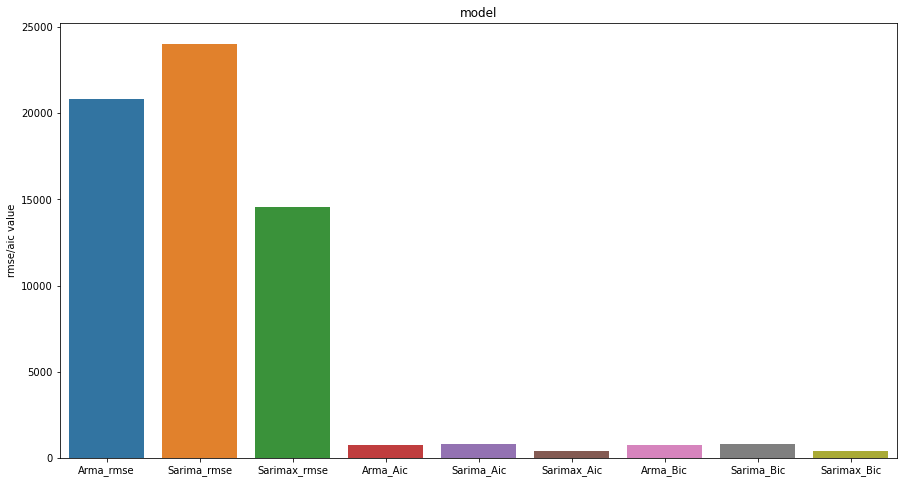

In [153]:
import seaborn as sns
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(names,results);
plt.ylabel('rmse/aic value')
plt.title('model');

In [154]:
from tabulate import tabulate

data=[["ARIMA",mse1,rmse1, aic1, bic1],
      ["SARIMA",mse2,rmse2,aic2, bic2],
       ["SARIMAX",mse3,rmse3,aic3, bic3]]
head=["MODEL","MSE","RMSE","AIC","BIC"]
print(tabulate(data, headers=head, tablefmt="grid"))


+---------+-------------+---------+---------+---------+
| MODEL   |         MSE |    RMSE |     AIC |     BIC |
+=========+=============+=========+=========+=========+
| ARIMA   | 4.34274e+08 | 20839.2 | 755.845 | 760.335 |
+---------+-------------+---------+---------+---------+
| SARIMA  | 5.7759e+08  | 24033.1 | 797.529 | 802.28  |
+---------+-------------+---------+---------+---------+
| SARIMAX | 2.1225e+08  | 14568.8 | 421.388 | 426.367 |
+---------+-------------+---------+---------+---------+


# Hence, SARIMAX MODEL performed the best in terms of all evaluation parameters performed by achieving lower results for MSE,RMSE,AIC and BIC than Sarima and arima models.

# SARIMAX model: This model takes into account exogenous variables, or in other words, use external data in our forecast.  All exogenous factors are still technically indirectly modeled in the historical model forecast. That being said, if we include external data, the model will respond much quicker to its affect than if we rely on the influence of lagging terms.